<a href="https://colab.research.google.com/github/subash3597/walmart-data-analysis-project/blob/main/walmart_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LIBRARIES INSTALLATION

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

FILES UPLOADING

In [3]:
from google.colab import files
uploaded=files.upload()

Saving train.csv to train.csv


In [4]:
from google.colab import files
uploaded=files.upload()

Saving features.csv to features.csv


In [5]:
from google.colab import files
uploaded=files.upload()

Saving stores.csv to stores.csv


MERGING

In [6]:
train=pd.read_csv('train.csv')
features=pd.read_csv('features.csv')
stores=pd.read_csv('stores.csv')

In [7]:
merged=pd.merge(train,features,on=['Store','Date'],how='left')

In [8]:
merged=pd.merge(merged,stores,on='Store',how='left')

In [9]:
merged.to_csv('merged_walmart_data.csv',index=False)

In [ ]:
files.download('merged_walmart_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
from google.colab import files
uploaded=files.upload()

Saving merged_walmart_data (2).csv to merged_walmart_data (2).csv


In [13]:
df=pd.read_csv('merged_walmart_data (2).csv')

FIRST LOOK TO DATA

In [15]:
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [14]:
df.tail(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False,B,118221
421569,45,98,2012-10-26,1076.80,False,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False,B,118221


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  IsHoliday_y   421570 non-null  bool   
 15  Type          421570 non-null  object 
 16  Size          421570 non-null  int64  
dtypes: bool(2), float64(10), int64(3), object(2)
mem

In [17]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


REMOVING DUPLICATE COLUMN

In [18]:
duplicate_columns = []
cols = df.columns

for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        if df[cols[i]].equals(df[cols[j]]):
            duplicate_columns.append((cols[i], cols[j]))

print("Duplicate column pairs:", duplicate_columns)


Duplicate column pairs: [('IsHoliday_x', 'IsHoliday_y')]


From above result IsHoliday_x', 'IsHoliday_y are duplicate columns. So we have to remove any one column

In [19]:
df.drop(['IsHoliday_y'],axis=1,inplace=True)

RENAME COLUMN

In [20]:
df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True)

CHECKING DUPLICATE VALUES

In [21]:
duplicates=df.duplicated().sum()
print(duplicates)
#No duplicates found

0


MISSING VALUES

In [22]:
missing_values=df.isnull().sum().reset_index()
print(missing_values)

           index       0
0          Store       0
1           Dept       0
2           Date       0
3   Weekly_Sales       0
4      IsHoliday       0
5    Temperature       0
6     Fuel_Price       0
7      MarkDown1  270889
8      MarkDown2  310322
9      MarkDown3  284479
10     MarkDown4  286603
11     MarkDown5  270138
12           CPI       0
13  Unemployment       0
14          Type       0
15          Size       0


Mark down columns are discount days lots of days have no discounts so we can replace null values with 0 for calculations.

Text(0.5, 1.0, 'MISSING VALUES IN EACH COLUMN')

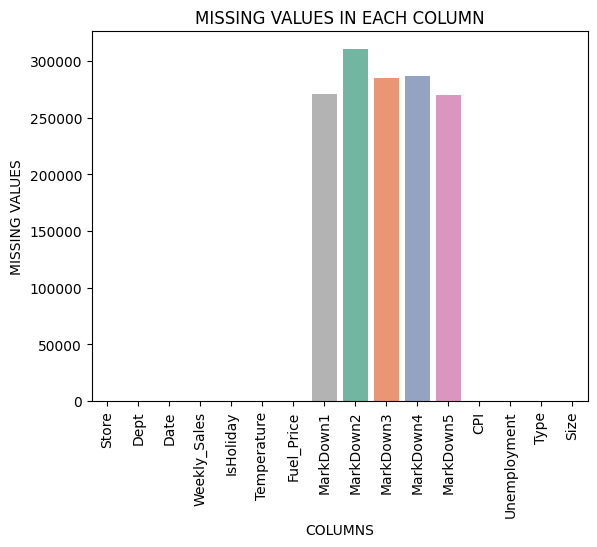

In [25]:
sns.barplot(x='index',y=0,data=missing_values,palette='Set2')
plt.xlabel('COLUMNS')
plt.xticks(rotation=90)
plt.ylabel('MISSING VALUES')
plt.title('MISSING VALUES IN EACH COLUMN')

FILLING NULL VALUES

In [26]:
df[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']]=df[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)

In [27]:
df.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Temperature,0
Fuel_Price,0
MarkDown1,0
MarkDown2,0
MarkDown3,0


NUMERICAL COLUMNS

In [28]:
numeric_cols=df.select_dtypes(include='number').columns
print(numeric_cols)

Index(['Store', 'Dept', 'Weekly_Sales', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Size'],
      dtype='object')


In [29]:
numeric_cols.nunique()

13


There are 13 Numerical columns

VALUES DISTRIBUTION COLUMN WISE

In [30]:
numeric_col=df[['Store', 'Dept', 'Weekly_Sales', 'Temperature', 'Fuel_Price','CPI','Unemployment', 'Size']]

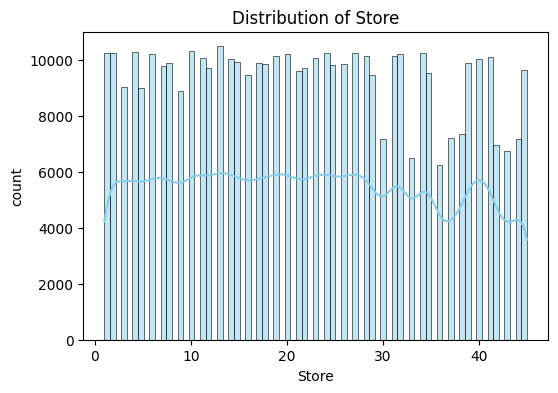

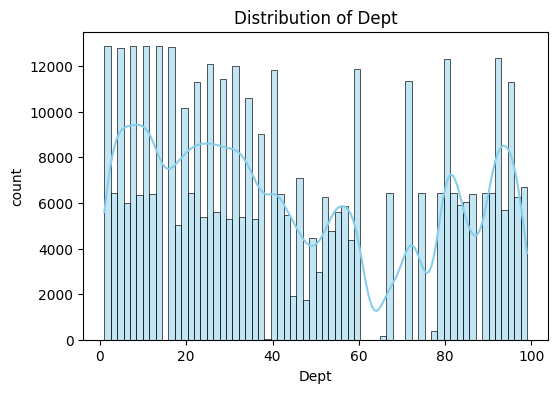

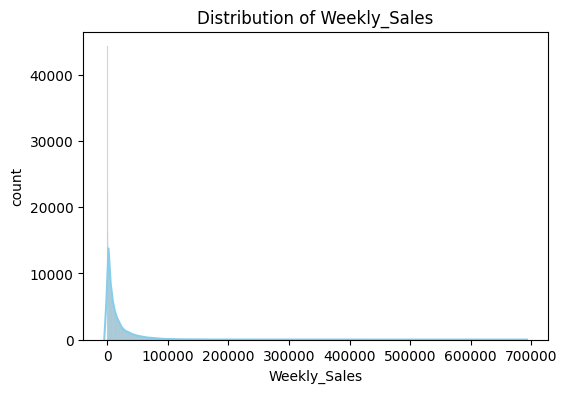

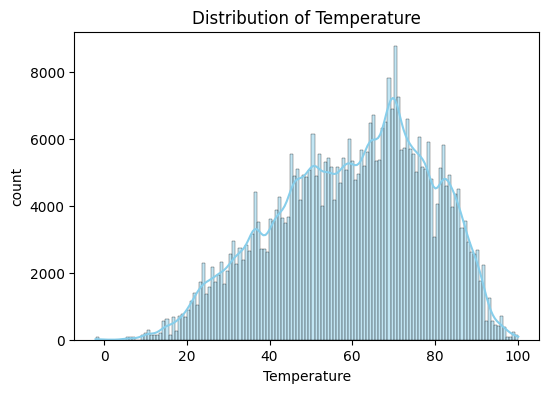

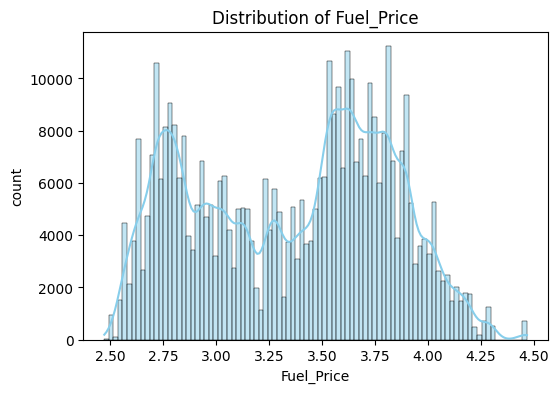

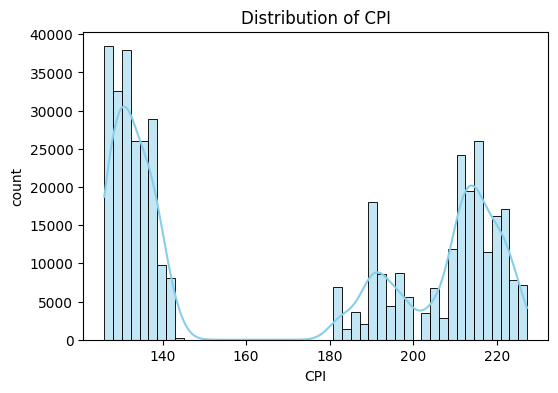

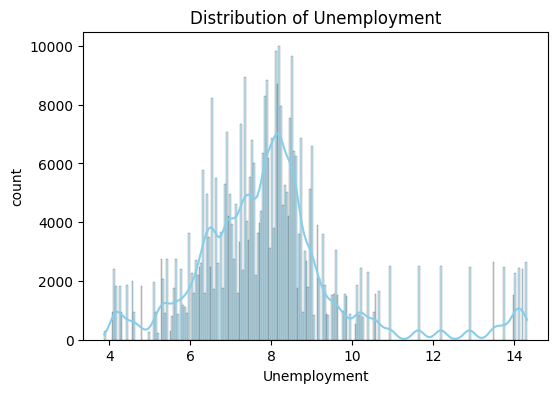

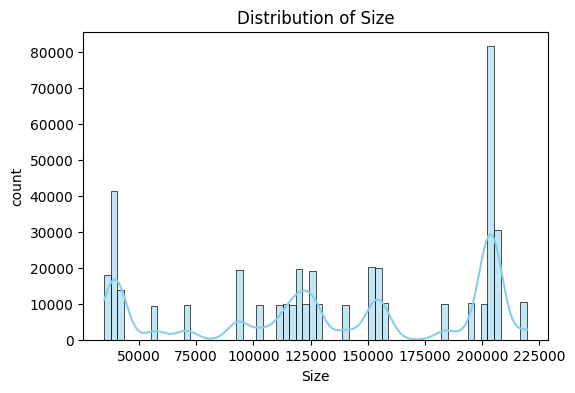

In [31]:
for col in numeric_col:
  plt.figure(figsize=(6,4))
  sns.histplot(x=df[col],data=df,kde=True,color='skyblue')
  plt.xlabel(col)
  plt.ylabel('count')
  plt.title(f'Distribution of {col}')
  plt.show()

In [32]:
markdowns=df[["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]]

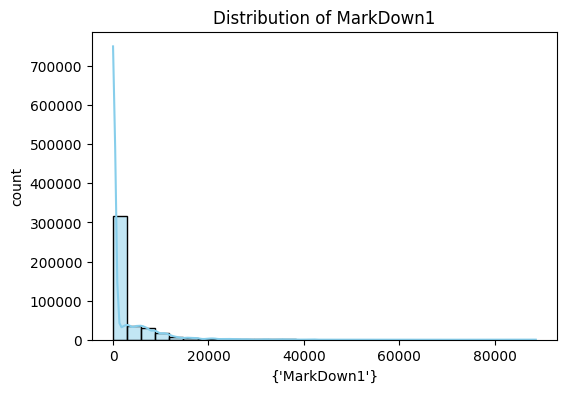

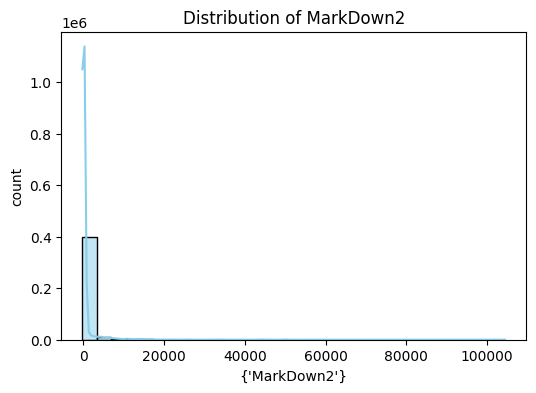

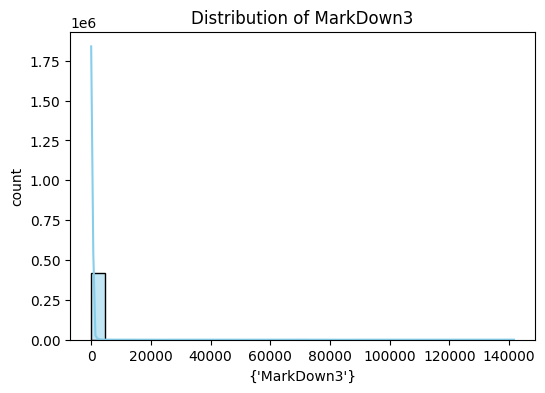

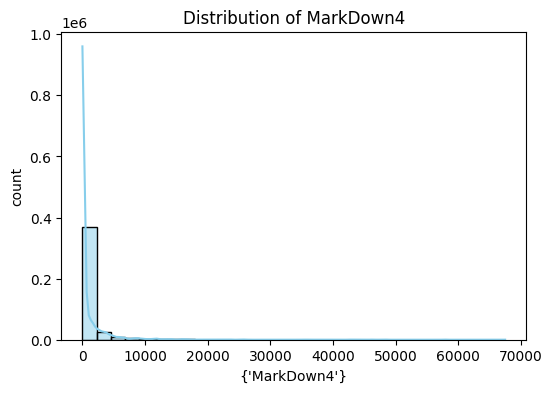

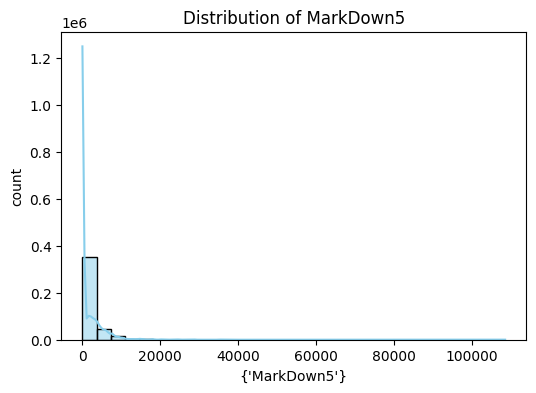

In [33]:
for cols in markdowns:
   plt.figure(figsize=(6,4))
   sns.histplot(x=cols,data=df,kde=True,color='skyblue',bins=30)
   plt.xlabel({cols})
   plt.ylabel('count')
   plt.title(f'Distribution of {cols}')
   plt.show()

STORE AND DEPARTMENT NUMBERS

In [34]:
df['Dept'].nunique()

81

In [35]:
df['Dept'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99, 39, 50, 43, 65])

 Department numbers are from 1 to 99, but some numbers are missing such as there is 53,57,61 to 64,66,68 to 70,73,75,76,84,86,88,89 etc.The total number of departments is 81.

In [36]:
df['Store'].nunique()

45

In [37]:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

Store numbers begin from 1 to 45.The total number of stores is 45

SALES HAVE NEGATIVE VALUES

In [38]:
negative_sales=df.loc[df['Weekly_Sales']<0]

In [39]:
negative_sales.shape

(1285, 16)

Text(0.5, 1.0, 'NEGATIVE SALES IN EACH TYPE')

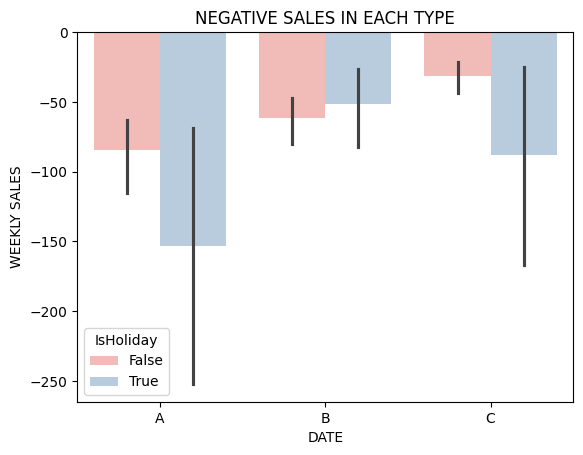

In [40]:
sns.barplot(x='Type',y='Weekly_Sales',hue='IsHoliday' ,data=negative_sales,palette='Pastel1')
plt.xlabel('DATE')
plt.ylabel('WEEKLY SALES')
plt.title('NEGATIVE SALES IN EACH TYPE')

REMOVING NEGATIVE VALUES

Negative sales can occur due to mistakes in manual entry or returns/refunds are recorded as negative sales. so we can remove.

In [41]:
df=df.loc[df['Weekly_Sales']>0].copy()

DATE ANALYSING

In [42]:
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')

In [43]:
print('Start:',df['Date'].min())
print('End:',df['Date'].max())

Start: 2010-02-05 00:00:00
End: 2012-10-26 00:00:00


Data's are from 5th feb of 2010 to 26th october 2012

CORRELATION BETWEEN COLUMNS

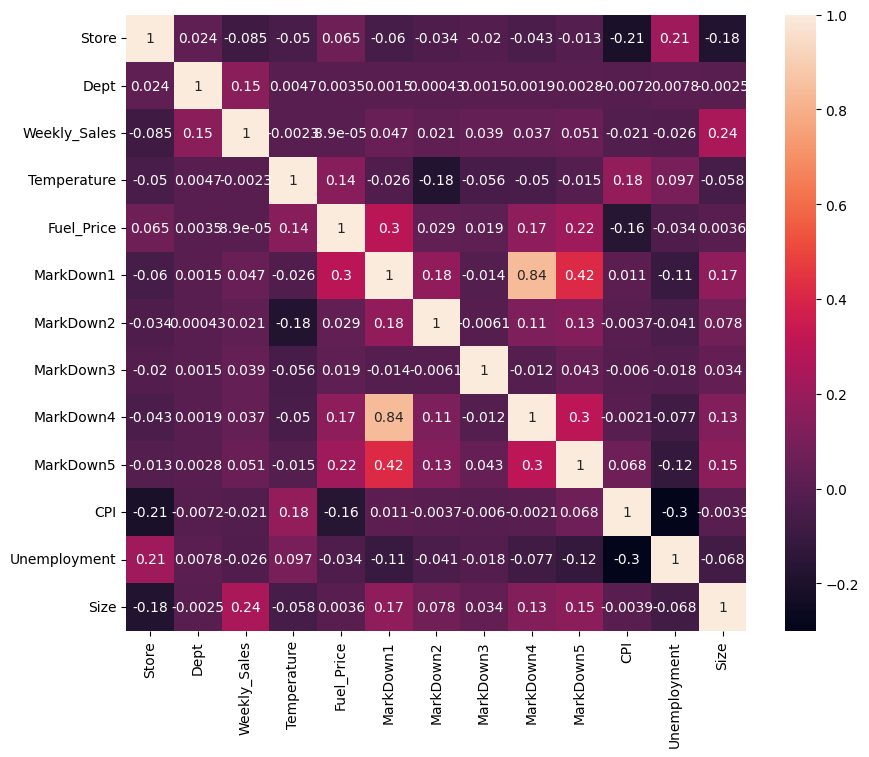

In [44]:
numeric_df=df.select_dtypes(include='number')
correlation_matrix=numeric_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True)
plt.show()

TYPE OF STORES WISE OVERALL SALES

There are 3 different types of stores.

In [45]:
df['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

In [46]:
piech=df.groupby('Type')['Weekly_Sales'].sum().reset_index()
print(piech)

  Type  Weekly_Sales
0    A  4.331057e+09
1    B  2.000742e+09
2    C  4.055080e+08


([<matplotlib.patches.Wedge at 0x7fe6fff53d50>,
 [Text(-0.4772403201692241, 0.991081064698936, 'A'),
  Text(0.28244771040735195, -1.06311960328349, 'B'),
  Text(1.0803936375263465, -0.20675973494031516, 'C')])

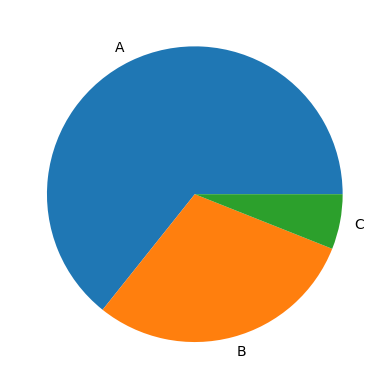

In [47]:
plt.pie('Weekly_Sales',labels='Type',data=piech)


Type A has more sales.

TYPE WISE STORE COUNTS

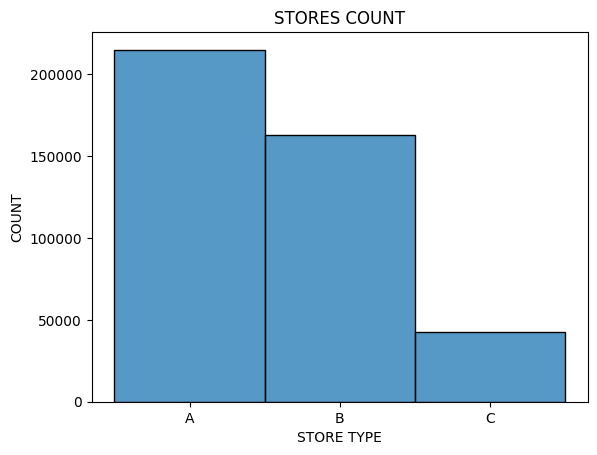

In [48]:
sns.histplot(x='Type',data=df)
plt.xlabel('STORE TYPE')
plt.ylabel('COUNT')
plt.title('STORES COUNT')
plt.show()

Type A store count is high so sales also high is 4.321 billion

TEMPERATURE VS SALES:

In [49]:
def temp_group(temp):
  if temp<40:
    return "Low"
  elif temp<=70:
    return "Medium"
  else:
    return "High"
df['Tempertaure_group']=df['Temperature'].apply(temp_group)

In [50]:
temp_grouped=df.groupby('Tempertaure_group')['Weekly_Sales'].sum().reset_index()
print(temp_grouped)

  Tempertaure_group  Weekly_Sales
0              High  2.285476e+09
1               Low  1.069516e+09
2            Medium  3.382315e+09


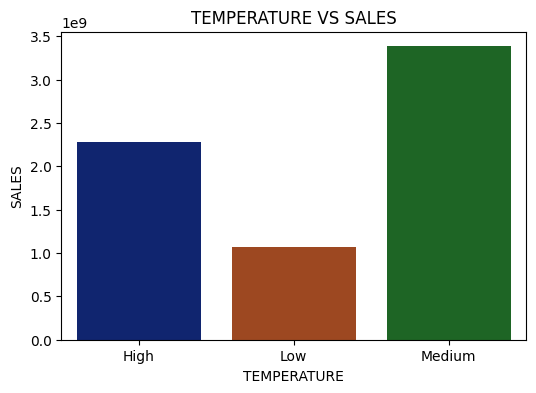

In [51]:
plt.figure(figsize=(6,4))
sns.barplot(x='Tempertaure_group',y='Weekly_Sales',data=temp_grouped,palette='dark')
plt.xlabel('TEMPERATURE')
plt.ylabel('SALES')
plt.title('TEMPERATURE VS SALES')
plt.show()

HOLIDAY and NON-HOLIDAY VS SALES

In [52]:
holiday_grouped=df.groupby('IsHoliday')['Weekly_Sales'].sum().reset_index()
print(holiday_grouped)

   IsHoliday  Weekly_Sales
0      False  6.232000e+09
1       True  5.053075e+08


IN HOLIDAYS = 50.53 CRORES AND NON HOILDAYS =623 CRORES SALES

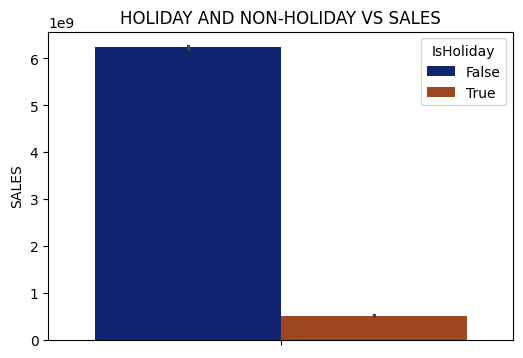

In [53]:
plt.figure(figsize=(6,4))
sns.barplot(hue='IsHoliday',y='Weekly_Sales',data=df,estimator=np.sum,palette='dark')
plt.ylabel('SALES')
plt.title('HOLIDAY AND NON-HOLIDAY VS SALES')
plt.show()

In [54]:
df_holiday = df.loc[df['IsHoliday']==True]
df_holiday['Date'].unique()

<DatetimeArray>
['2010-02-12 00:00:00', '2010-09-10 00:00:00', '2010-11-26 00:00:00',
 '2010-12-31 00:00:00', '2011-02-11 00:00:00', '2011-09-09 00:00:00',
 '2011-11-25 00:00:00', '2011-12-30 00:00:00', '2012-02-10 00:00:00',
 '2012-09-07 00:00:00']
Length: 10, dtype: datetime64[ns]

In [55]:
df_holiday = df.loc[df['IsHoliday']==True]
df_holiday['Date'].nunique()

10

Totaly there are 10 holiday weeks.
There are 4 leave days.            
1.Super Bowl: '2010-02-12','2011-02-11','2012-02-10'         
2.Labour day: '2010-09-10','2011-09-09','2012-09-07'         
3.Thanks giving:'2010-11-26','2011-11-25','2012-09-07'           
4.Christmas: '2010-12-31','2011-12-30'

In [56]:
df_non_holiday = df.loc[df['IsHoliday']==False]
df_non_holiday['Date'].nunique()

133

There are 133 non-holiday weeks.

In [57]:
holiday_avg=df[df["IsHoliday"]==True]['Weekly_Sales'].mean()
non_holiday_avg=df[df["IsHoliday"]==False]['Weekly_Sales'].mean()
print("Average sales for holiday weeks:",holiday_avg)
print("Average sales for non-holiday weeks:",non_holiday_avg)

Average sales for holiday weeks: 17094.300918470904
Average sales for non-holiday weeks: 15952.816351944955


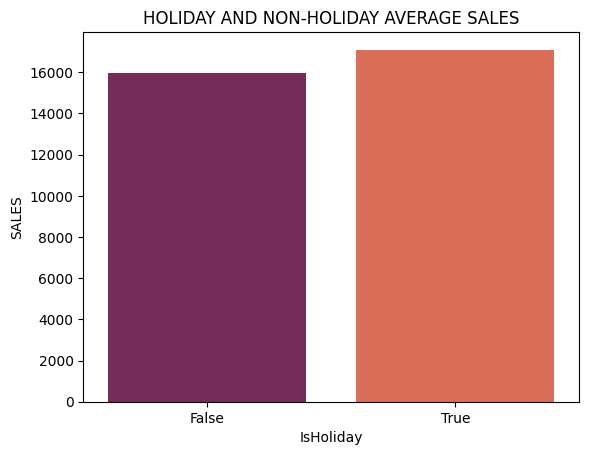

In [58]:
avg_sales=df.groupby('IsHoliday')['Weekly_Sales'].mean().reset_index()
sns.barplot(x='IsHoliday',y='Weekly_Sales',data=avg_sales,palette='rocket')
plt.ylabel('SALES')
plt.title('HOLIDAY AND NON-HOLIDAY AVERAGE SALES')
plt.show()

So comparatively holiday weeks are less but holiday weeks average sales are high

HOLIDAYS NAMING

In [59]:
def holiday_naming(a):
  if a in ['2010-02-12','2011-02-11','2012-02-10']:
    return 'Super bowl'
  elif a in ['2010-09-10' or '2011-09-09' or '2012-09-07']:
    return 'Labour day'
  elif a in ['2010-11-26' or '2011-11-25' or '2012-09-07']:
    return 'Thanks giving'
  elif a in ['2010-12-31' or '2011-12-30']:
    return 'Christmas'
  else:
    return 'Normal'
df['Holiday_name']=df['Date'].dt.strftime('%Y-%m-%d').apply(holiday_naming)


HOLIDAY CATEGORY WISE SALE

In [60]:
df_holiday=df[df['Holiday_name']!='Normal']

In [61]:
df_holiday_category=df_holiday.groupby('Holiday_name')['Weekly_Sales'].sum().reset_index()
print(df_holiday_category)

    Holiday_name  Weekly_Sales
0      Christmas  4.043474e+07
1     Labour day  4.563542e+07
2     Super bowl  1.456838e+08
3  Thanks giving  6.582122e+07


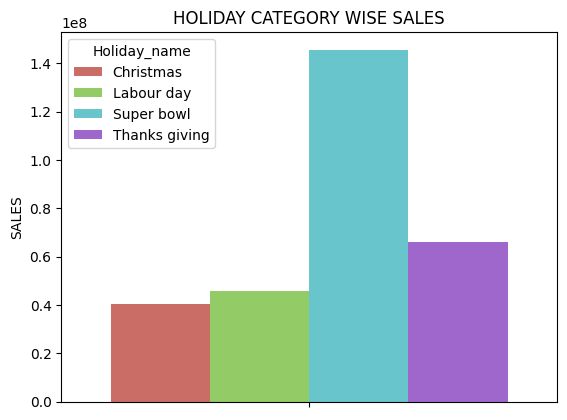

In [62]:
sns.barplot(hue='Holiday_name',y='Weekly_Sales',data=df_holiday_category,palette='hls')
plt.ylabel('SALES')
plt.title('HOLIDAY CATEGORY WISE SALES')
plt.show()

The highest sale on super Bowl day 14 crores because is a major american sports event. People host parties,buy snacks etc,.

HIGHEST SALE BY YEARS

In [63]:
df_year_total_sales=df.groupby(df['Date'].dt.year)['Weekly_Sales'].sum().reset_index()
df_year_total_sales['Type']='Total'
print(df_year_total_sales)

   Date  Weekly_Sales   Type
0  2010  2.288919e+09  Total
1  2011  2.448233e+09  Total
2  2012  2.000156e+09  Total


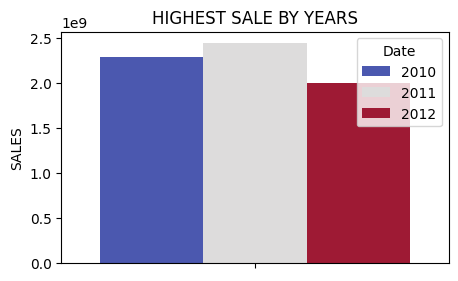

In [64]:
plt.figure(figsize=(5,3))
sns.barplot(hue='Date',y='Weekly_Sales',data=df_year_total_sales,palette='coolwarm')
plt.ylabel('SALES')
plt.title('HIGHEST SALE BY YEARS')
plt.show()

2011 Have highest sales 228 crores

In [65]:
df_year_avg_sales=df.groupby(df['Date'].dt.year)['Weekly_Sales'].mean().reset_index()
df_year_avg_sales['Type']='Average'
print(df_year_avg_sales)

   Date  Weekly_Sales     Type
0  2010  16318.648285  Average
1  2011  16007.797985  Average
2  2012  15748.265005  Average


AVERAGE SALES PER WEEK BY YEARS

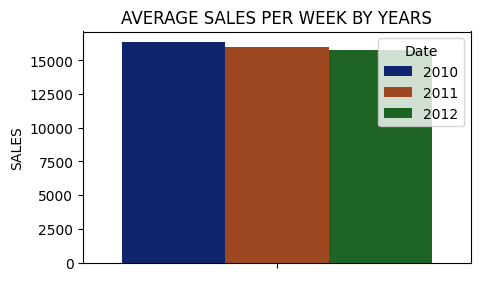

In [66]:
plt.figure(figsize=(5,3))
sns.barplot(hue='Date',y='Weekly_Sales',data=df_year_avg_sales,palette='dark')
plt.ylabel('SALES')
plt.title('AVERAGE SALES PER WEEK BY YEARS')
plt.show()

In 2010 the average sales per week is high 16318.Average is low and total sales is high because some weeks have highest sales

In [67]:
df_highest_sales=df['Weekly_Sales'].max()
print(df_highest_sales)

693099.36


HIGHEST SALE DAY

In [68]:
highest_sale_row = df.loc[df['Weekly_Sales'].idxmax()]
print("📌 Highest sale happened on:")
print("Date:", highest_sale_row['Date'].date())
print("Sales:", highest_sale_row['Weekly_Sales'])
print("Store:", highest_sale_row['Store'])
print("Department:", highest_sale_row['Dept'])


📌 Highest sale happened on:
Date: 2010-11-26
Sales: 693099.36
Store: 10
Department: 72


YEAR WISE HIGHEST SALE DAY

In [69]:
highest_sales_by_year = df.loc[df.groupby(df['Date'].dt.year)['Weekly_Sales'].idxmax()]
highest_sales_by_year[['Date', 'Weekly_Sales', 'Store', 'Dept','Holiday_name']].reset_index(drop=True)

,Date,Weekly_Sales,Store,Dept,Holiday_name
0,2010-11-26,693099.36,10,72,Thanks giving
1,2011-11-25,649770.18,35,72,Normal
2,2012-02-10,233140.32,10,72,Super bowl


MONTH WISE SALES

In [70]:
df['Month']=pd.to_datetime(df['Date']).dt.strftime('%B')

In [71]:
df_month=df.groupby(df['Month'])['Weekly_Sales'].sum().reset_index().sort_values(by='Weekly_Sales',ascending=False)
print(df_month)

        Month  Weekly_Sales
5        July  6.500089e+08
0       April  6.468658e+08
6        June  6.226335e+08
1      August  6.130979e+08
7       March  5.927974e+08
10    October  5.847954e+08
11  September  5.787751e+08
2    December  5.768491e+08
3    February  5.687339e+08
8         May  5.571298e+08
9    November  4.130185e+08
4     January  3.326019e+08


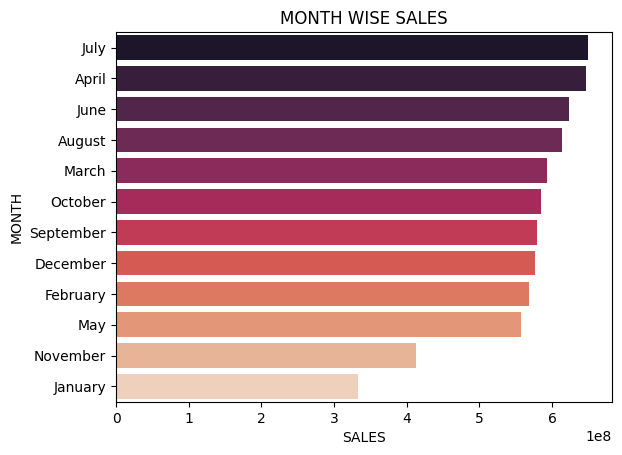

In [72]:
sns.barplot(x='Weekly_Sales',y='Month',data=df_month,palette='rocket')
plt.xlabel('SALES')
plt.ylabel('MONTH')
plt.title('MONTH WISE SALES')
plt.show()

In july and april months sales are high

In [24]:
import warnings
warnings.simplefilter('ignore',category=FutureWarning)

STORE WISE SALES

In [73]:
sales=df.groupby('Store')['Weekly_Sales'].sum().reset_index()


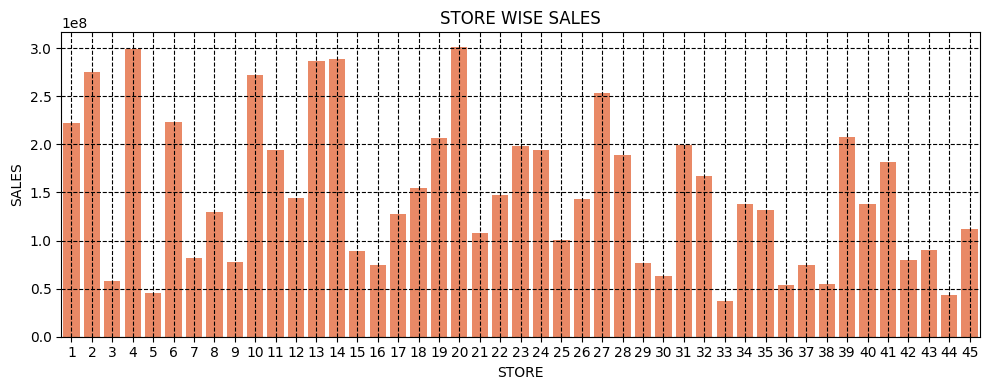

In [74]:
plt.figure(figsize=(10,4))
sns.barplot(x='Store',y='Weekly_Sales',data=sales,color='coral')
plt.grid(True,color='black',linewidth=0.8,linestyle='--')
plt.xlabel('STORE')
plt.ylabel('SALES')
plt.title('STORE WISE SALES')
plt.tight_layout()
plt.show()

TOP 5 HIGHEST SALES BY DEPARTMENT

In [75]:
department_sales=(df.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False).head(5).index.tolist())
top_dept=df.loc[df.groupby('Dept')['Weekly_Sales'].idxmax()]
result=top_dept[top_dept['Dept'].isin(department_sales)]
result=result.sort_values(by='Weekly_Sales',ascending=False)


print(result[['Dept', 'Date', 'Weekly_Sales']])



        Dept       Date  Weekly_Sales
95373     72 2010-11-26     693099.36
137206    92 2010-02-05     293966.05
137635    95 2010-02-05     213042.66
15367     38 2010-03-12     172794.20
136920    90 2010-02-05     166263.81


Text(0, 0.5, 'SALES')

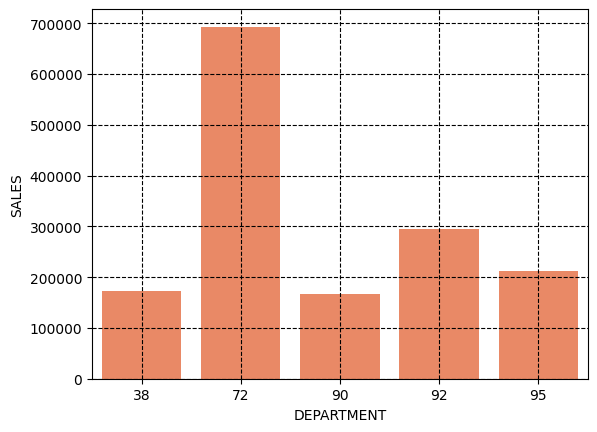

In [76]:
sns.barplot(x='Dept',y='Weekly_Sales',data=result,color='coral')
plt.grid(True,color='black',linewidth=0.8,linestyle='--')
plt.xlabel('DEPARTMENT')
plt.ylabel('SALES')